In [72]:
import pandas as pd
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [73]:
# Read the data chunk by chunk from chunk_0.json to chunk_8.json
DATA_PATH = '../d3-ts-website/src/data/'
TOTAL_CHUNKS = 9

data = pd.DataFrame()

for i in tqdm(range(TOTAL_CHUNKS)):
    with open(DATA_PATH + f'chunk_{i}.json', encoding='utf-8') as f:
        chunk = json.load(f)
        data = pd.concat([data, pd.DataFrame(chunk).T])

100%|██████████| 9/9 [00:11<00:00,  1.28s/it]


In [74]:
data.head()

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags
20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow..."
655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'..."
1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,https://cdn.akamai.steamstatic.com/steam/apps/...,...,,0,0,0 - 20000,0,0,0,0,0,[]
1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su..."
1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '..."


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85103 entries, 20200 to 2738840
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      85103 non-null  object
 1   release_date              85103 non-null  object
 2   required_age              85103 non-null  object
 3   price                     85103 non-null  object
 4   dlc_count                 85103 non-null  object
 5   detailed_description      85103 non-null  object
 6   about_the_game            85103 non-null  object
 7   short_description         85103 non-null  object
 8   reviews                   85103 non-null  object
 9   header_image              85103 non-null  object
 10  website                   85103 non-null  object
 11  support_url               85103 non-null  object
 12  support_email             85103 non-null  object
 13  windows                   85103 non-null  object
 14  mac                  

# Data Cleaning

In [76]:
import datetime

def add_missing_day(date):
    try:
        # Try to parse the date with the expected format
        datetime.datetime.strptime(date, '%b %d, %Y')
        # If it succeeds, return the date as is
        return date
    except ValueError:
        # If it fails, it means the day is missing. Add it behind the month
        return date.replace(' ', ' 1, ')

# Apply the function to the release_date column
data['release_date'] = data['release_date'].apply(add_missing_day)

In [77]:
# Convert release_date to datetime format %b %d, %Y
data['release_date'] = pd.to_datetime(data['release_date'], format='%b %d, %Y')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85103 entries, 20200 to 2738840
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      85103 non-null  object        
 1   release_date              85103 non-null  datetime64[ns]
 2   required_age              85103 non-null  object        
 3   price                     85103 non-null  object        
 4   dlc_count                 85103 non-null  object        
 5   detailed_description      85103 non-null  object        
 6   about_the_game            85103 non-null  object        
 7   short_description         85103 non-null  object        
 8   reviews                   85103 non-null  object        
 9   header_image              85103 non-null  object        
 10  website                   85103 non-null  object        
 11  support_url               85103 non-null  object        
 12  support_email    

# View the distribution of the data

C:\Users\eddie\.conda\envs\SteamVisualization\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


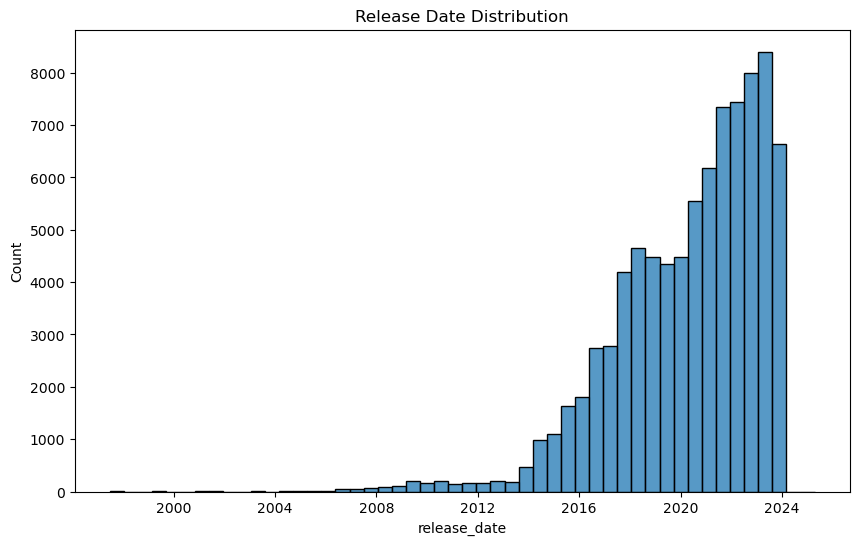

In [79]:
# Plot release_date distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['release_date'], bins=50)
plt.title('Release Date Distribution')
plt.show()

C:\Users\eddie\.conda\envs\SteamVisualization\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


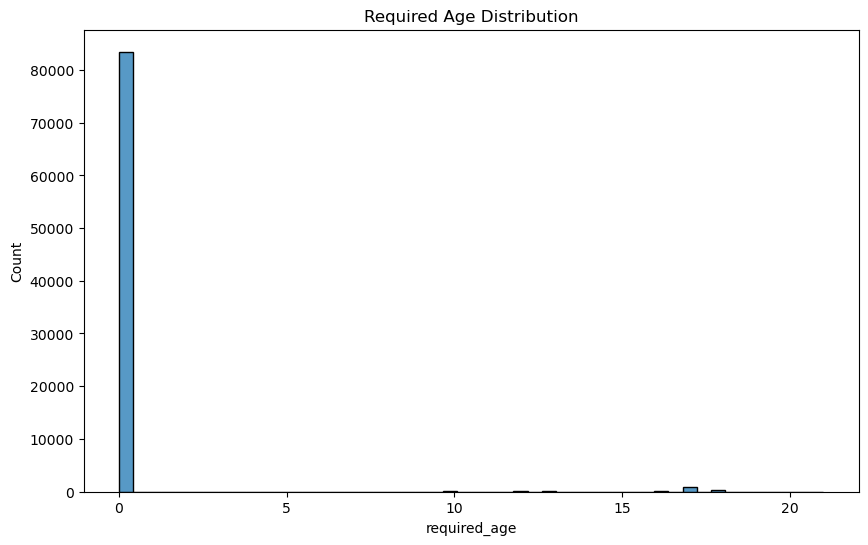

In [80]:
# Plot the required_age
plt.figure(figsize=(10, 6))
sns.histplot(data['required_age'], bins=50)
plt.title('Required Age Distribution')
plt.show()

In [81]:
# Check unique values of categories (A list of categories)
data['categories'].explode().unique()

array(['Single-player', 'Multi-player', 'Steam Achievements',
       'Partial Controller Support', 'Full controller support',
       'Steam Leaderboards', 'Remote Play on Phone',
       'Remote Play on Tablet', 'Remote Play on TV', 'MMO', 'PvP',
       'Online PvP', 'Co-op', 'Online Co-op', 'In-App Purchases',
       'Steam Cloud', 'Steam Trading Cards', 'Shared/Split Screen',
       'Cross-Platform Multiplayer', 'Remote Play Together', 'Stats',
       'Shared/Split Screen PvP', nan, 'Captions available',
       'Steam Workshop', 'Includes level editor', 'LAN PvP', 'LAN Co-op',
       'Shared/Split Screen Co-op', 'Steam Turn Notifications',
       'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled',
       'Includes Source SDK', 'Commentary available',
       'Mods (require HL2)', 'Mods', 'Tracked Motion Controller Support',
       'Tracked Controller Support', 'VR Only', 'VR Supported',
       'HDR available'], dtype=object)

In [82]:
data['genres'].explode().unique()

array(['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Strategy',
       'Free to Play', 'Massively Multiplayer', 'RPG', 'Simulation',
       'Early Access', 'Racing', 'Utilities', nan, 'Education',
       'Sexual Content', 'Nudity', 'Violent', 'Gore',
       'Design & Illustration', 'Animation & Modeling',
       'Game Development', 'Web Publishing', 'Software Training',
       'Photo Editing', 'Audio Production', 'Video Production',
       'Accounting', 'Movie', 'Documentary', 'Episodic', 'Short',
       'Tutorial', '360 Video'], dtype=object)

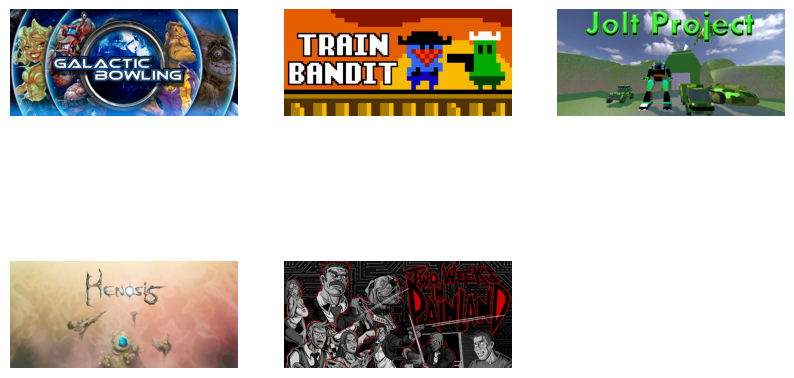

In [86]:
import requests
from io import BytesIO

# Plot header_image of first 5 rows
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    # Open url image
    response = requests.get(data['header_image'].iloc[i])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [90]:
# Count games released since 2020
data[data['release_date'] >= '2023-01-01'].shape[0]

15821